# Фінальний проєкт
Спочатку познайомимося з нашим набором даних і його описом.

# Завантаження бібліотек та набору даних

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns
import warnings


- Завантажуємо CSV-файл за допомогою pandas


In [2]:
df = pd.read_csv('Global_Music_Streaming_Listener_Preferences.csv')

### File Description:
**File Name:** `Global_Music_Streaming_Listener_Preferences.csv`  
**Size:** ~5,000 rows  
**Format:** CSV  

---

### Column Descriptions:

| **Column Name**                           | **Description (English)**                                      | **Опис (Українською)**                                         |
|--------------------------------------------|---------------------------------------------------------------|----------------------------------------------------------------|
| **User_ID**                                | Unique identifier for each listener                           | Унікальний ідентифікатор кожного слухача                      |
| **Age**                                    | Age of the listener                                           | Вік слухача                                                   |
| **Country**                                | Country where the user resides                                | Країна, де проживає користувач                               |
| **Streaming Platform**                     | The platform used (Spotify, Apple Music, etc.)               | Платформа, яку використовує слухач (Spotify, Apple Music тощо) |
| **Top Genre**                              | The most streamed music genre                                | Найбільш прослухуваний музичний жанр                          |
| **Minutes Streamed Per Day**               | Average daily listening time                                  | Середній час прослуховування на день                          |
| **Number of Songs Liked**                  | Total liked songs by the user                                | Загальна кількість пісень, які користувач позначив як улюблені |
| **Most Played Artist**                     | The most played artist by the user                          | Найчастіше прослуховуваний виконавець                          |
| **Subscription Type**                      | Free or Premium subscription                                | Тип підписки (безкоштовна чи преміум)                         |
| **Listening Time (Morning/Afternoon/Night)** | When the user listens the most                             | Час доби, коли слухач слухає найбільше (ранок, день, ніч)     |
| **Discover Weekly Engagement (%)**         | Percentage of auto-generated playlists played               | Відсоток відтворених автоматично створених плейлистів         |
| **Repeat Song Rate (%)**                   | Percentage of songs repeated frequently                     | Відсоток пісень, які часто повторюються                       


In [3]:
#загальний вигляд даних
pd.concat([df.head(3), df.tail(3)])

,User_ID,Age,Country,Streaming Platform,Top Genre,Minutes Streamed Per Day,Number of Songs Liked,Most Played Artist,Subscription Type,Listening Time (Morning/Afternoon/Night),Discover Weekly Engagement (%),Repeat Song Rate (%)
0,U1000,34,Japan,Tidal,Reggae,295,138,Adele,Free,Afternoon,47.42,16.74
1,U1001,24,Germany,Deezer,Country,86,388,Ed Sheeran,Premium,Night,12.06,69.25
2,U1002,49,Germany,Deezer,Pop,363,368,Post Malone,Premium,Afternoon,47.19,67.38
4997,U5997,27,Brazil,Amazon Music,Metal,568,277,Taylor Swift,Premium,Night,69.39,51.71
4998,U5998,58,Canada,Amazon Music,EDM,523,492,Bad Bunny,Premium,Night,43.44,24.53
4999,U5999,30,South Korea,YouTube,Rock,451,145,Adele,Premium,Night,15.45,79.46


In [4]:
# перейменуємо колонки для зручності
df = df.rename(columns={'Listening Time (Morning/Afternoon/Night)': 'Listening_Time', 'Discover Weekly Engagement (%)': 'Discover_Weekly_Engagement', 'Repeat Song Rate (%)': 'Repeat_Song_Rate'})
df.head(3)

,User_ID,Age,Country,Streaming Platform,Top Genre,Minutes Streamed Per Day,Number of Songs Liked,Most Played Artist,Subscription Type,Listening_Time,Discover_Weekly_Engagement,Repeat_Song_Rate
0,U1000,34,Japan,Tidal,Reggae,295,138,Adele,Free,Afternoon,47.42,16.74
1,U1001,24,Germany,Deezer,Country,86,388,Ed Sheeran,Premium,Night,12.06,69.25
2,U1002,49,Germany,Deezer,Pop,363,368,Post Malone,Premium,Afternoon,47.19,67.38


In [5]:
# вимкнення повідомлень про попередження
warnings.filterwarnings("ignore")

# Перевірка та очищення даних

In [6]:
# перевіряємо тип даних у наборі даних
df.dtypes

User_ID                        object
Age                             int64
Country                        object
Streaming Platform             object
Top Genre                      object
Minutes Streamed Per Day        int64
Number of Songs Liked           int64
Most Played Artist             object
Subscription Type              object
Listening_Time                 object
Discover_Weekly_Engagement    float64
Repeat_Song_Rate              float64
dtype: object

In [7]:
# перевірка на порожні значення
df.isnull().sum()

User_ID                       0
Age                           0
Country                       0
Streaming Platform            0
Top Genre                     0
Minutes Streamed Per Day      0
Number of Songs Liked         0
Most Played Artist            0
Subscription Type             0
Listening_Time                0
Discover_Weekly_Engagement    0
Repeat_Song_Rate              0
dtype: int64

In [8]:
# перевірка на дублі
df[df.duplicated()]

,User_ID,Age,Country,Streaming Platform,Top Genre,Minutes Streamed Per Day,Number of Songs Liked,Most Played Artist,Subscription Type,Listening_Time,Discover_Weekly_Engagement,Repeat_Song_Rate


Тепер ми впевнені в наших даних і можемо починати працювати над нашими питаннями.

# Основна частина дослідження даних

**1 Питання**
Яка кількість користувачів використовує кожну платформу та яке відсоткове відношення?

In [9]:
count_platforms = df['Streaming Platform'].value_counts()
display(count_platforms)

Streaming Platform
Amazon Music    861
Tidal           850
Deezer          844
Spotify         827
YouTube         822
Apple Music     796
Name: count, dtype: int64

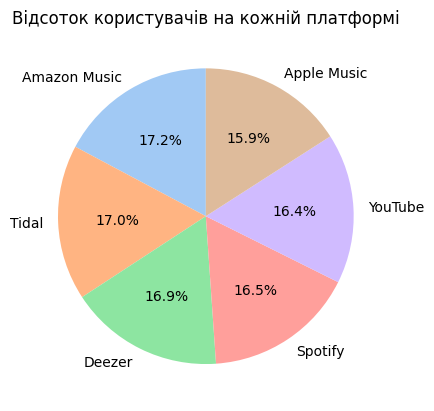

In [10]:
count_user_platforms_percent = df['Streaming Platform'].value_counts(normalize=True) * 100
# Використання пастельної палітри
palette = sns.color_palette('pastel')

fig, ax = plt.subplots()
ax.pie(count_user_platforms_percent, labels=count_user_platforms_percent.index, autopct = '%1.1f%%', colors=palette, startangle=90)
plt.title('Відсоток користувачів на кожній платформі')
plt.show()

**Висновок:** Найпопулярніші платформи для прослуховування музики Amazon Music та Tidal. 
Щоб виконавець мав більше прослуховувань потрібно домовитися з даними платформами.

**2 Питання:** Популярність платформ по країнам? Яку платформу обирають в кожній країні? Чи зберігається світова тенденція?

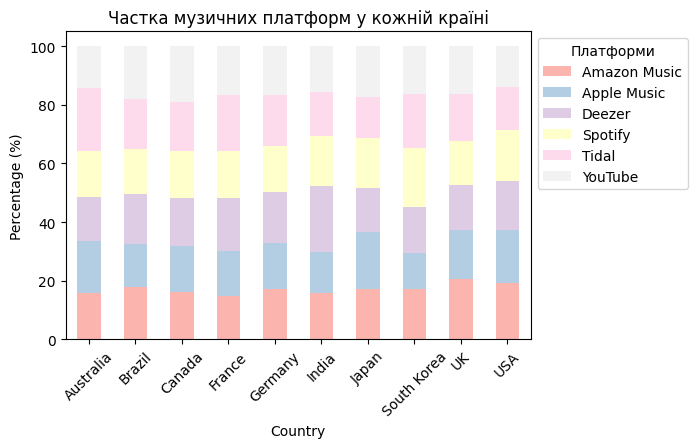

In [11]:
# групуємо та агрегуємо
df_pivot = df.pivot_table(index="Country", columns="Streaming Platform", aggfunc="size")
df_pivot = df_pivot.div(df_pivot.sum(axis=1), axis=0) * 100  # переводимо у відсотки

fig, ax = plt.subplots(figsize=(6, 4))

# Побудова stacked bar chart з пастельними кольорами
df_pivot.plot(kind="bar", stacked=True, colormap="Pastel1", ax=ax)

plt.xlabel("Country")
plt.ylabel("Percentage (%)")
plt.title("Частка музичних платформ у кожній країні")
plt.legend(title="Платформи", loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)

plt.show()


**Висновки:** По графіку бачимо, що використовуються всі платформи рівномірно. Одразу помітити різницю можемо в Австраліїї надають перевагу Tidal, а в Індії Deezer. Давайте дізнаємося, яка платформа займає перше місце в кожній країні?

In [12]:
# Яка платформа посідає 1 місце по країнах
top1_country = df.groupby(['Country', 'Streaming Platform'])['User_ID'].count().reset_index()
top1_country = top1_country.sort_values(['Country', 'User_ID'], ascending=[True, False])
top1_country = top1_country.groupby('Country').first() 

top1_country

,Streaming Platform,User_ID
Country,,
Australia,Tidal,113
Brazil,Amazon Music,91
Canada,YouTube,97
France,Tidal,94
Germany,Deezer,82
India,Deezer,110
Japan,Apple Music,95
South Korea,Spotify,104
UK,Amazon Music,106


**Висновки:** Якщо нас цікавлять конкретні країни для релізу треку, альбому чи нового виконавця. Можна почати з запропонованих варіантів платформ з більшою кількістю користувачів.

**3 Питання:** Топ 10 артистів, яких слухають найчастіше? 

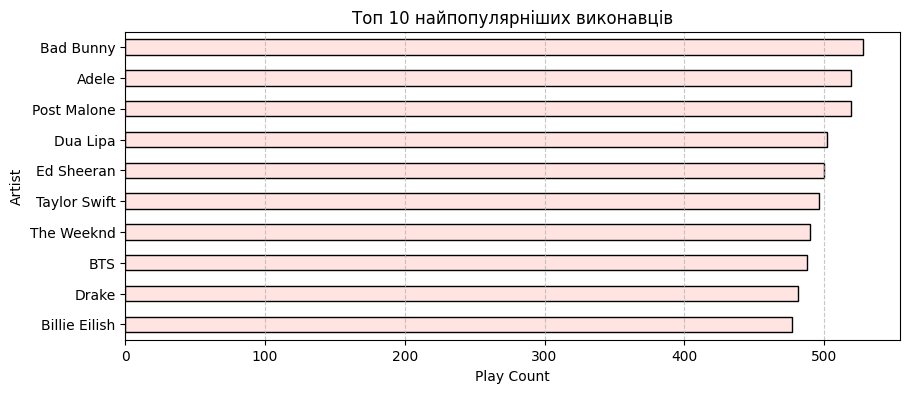

In [13]:
import matplotlib.pyplot as plt

# Рахуємо кількість відтворень для кожного артиста та вибираємо топ-10 за спаданням
top_artists = df['Most Played Artist'].value_counts().head(10)

plt.figure(figsize=(10,4))
top_artists.plot(kind='barh', color='mistyrose', edgecolor='black')

plt.xlabel('Play Count') 
plt.ylabel('Artist')  
plt.title('Топ 10 найпопулярніших виконавців')
plt.gca().invert_yaxis()  # Інвертуємо вісь y, щоб найбільш популярний був угорі
plt.grid(axis='x', linestyle='--', alpha=0.7) 

plt.show()


**Висновок:** Найпопулярніший виконавець Bad Bunny.  
Можемо створити альбом найпопулярніших виконавців для всіх користувачів і змінювати його кожного місяця або тижня.

**4 Питання:** Топ 5 найпопулярніших жанрів 

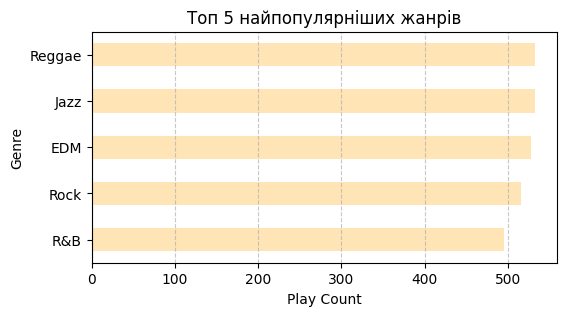

In [14]:
# топ 5 жанрів за спаданню
top_genre = df['Top Genre'].value_counts().head(5)
plt.figure(figsize=(6,3))
top_genre.plot(kind='barh', color='moccasin')

plt.xlabel('Play Count') 
plt.ylabel('Genre')  
plt.title('Топ 5 найпопулярніших жанрів')
plt.gca().invert_yaxis()  # Інвертуємо вісь y, щоб найбільш популярний був угорі
plt.grid(axis='x', linestyle='--', alpha=0.7) 

plt.show()

**Висновок:** Найпопулярніші жанри Reggae та Jazz.  
Можемо створити підбірки за жанрами для тих хто любить слухати один стиль музики.

**5 питання:** Який вік наших користувачів?

In [15]:
df['Age'].agg(['min', 'max', 'mean'])

min     13.000
max     60.000
mean    36.664
Name: Age, dtype: float64

Цікаво поглянути розріз віку по країнам чи зміниться діапазон?

In [16]:
df.groupby('Country')['Age'].agg(['min', 'max', 'mean']).round(1)

,min,max,mean
Country,,,
Australia,13,60,37.5
Brazil,13,60,36.2
Canada,13,60,37.0
France,13,60,37.0
Germany,13,60,35.9
India,13,60,36.2
Japan,13,60,36.5
South Korea,13,60,37.1
UK,13,60,36.6


Цікаво, що мінімальний та максимальний вік по країнам не змінився. Чому?
Можемо припустити такі гіпотези:
1) На початку збирання даних, була вибрана вікова група 13 - 60 р.
2) Наявні дані вже були відфільтровані по віку.
   
**Висновок:** Середній вік наших користувачів 35-37 років. Тобто ми орієнтуємоcя на потреби і смаки цієї вікової групи, щоб вони і далі були нашими користувачами, або якщо ми хочемо залучити молодшу вікову групу маємо проаналізувати це питання додатково.

**6 Питання:** Який стиль музики обирає кожна вікова група?

In [17]:
# додаємо колонку погруповану за віком
df['Age Group'] = pd.cut(df['Age'], bins=[12, 25, 35, 45, 60], labels=['13-25', '26-35', '36-45', '46-60'])

# Групуємо за віковими групами і музичними жанрами, рахуємо кількість
age_genre_count = df.groupby(['Age Group', 'Top Genre']).size().reset_index(name='Count')

# Знаходимо найпопулярніший жанр у кожній віковій групі
top_genre_by_age = age_genre_count.loc[age_genre_count.groupby('Age Group')['Count'].idxmax()]

print(top_genre_by_age)

   Age Group  Top Genre  Count
2      13-25        EDM    160
14     26-35       Jazz    133
28     36-45     Reggae    126
30     46-60  Classical    168


**Висновок:** В залежності від віку можемо рекомендувати відповідний жанр музики.

**7 Питання:** Чи залежить кількість проведеного часу від музичних вподобань, кількості повторних прослуховувань?

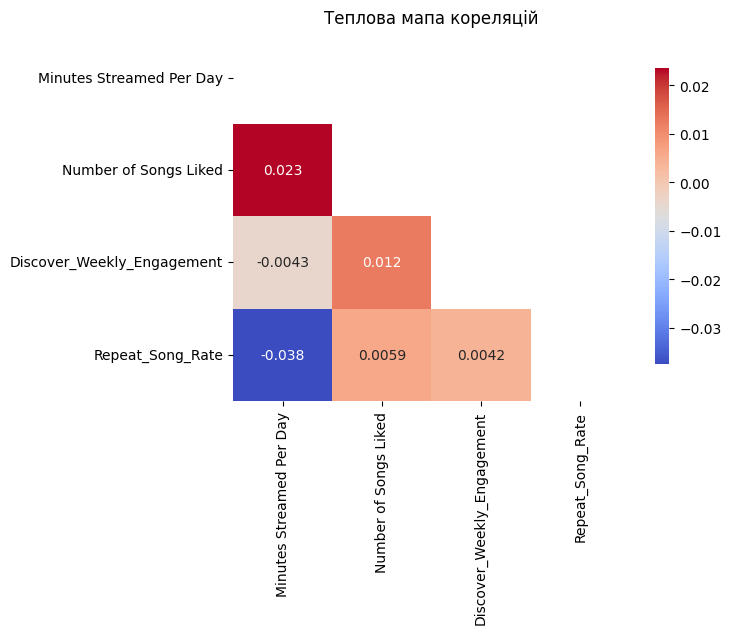

In [18]:
# будуємо теплову мапу
corr_matrix = df[['Minutes Streamed Per Day', 'Number of Songs Liked', 'Discover_Weekly_Engagement', 'Repeat_Song_Rate']].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', cbar_kws={"shrink": 0.8})
plt.title('Теплова мапа кореляцій')
plt.show()

Що ми бачимо з графіку?

- *Найбільший показник* між кількістю лайків та кількістю часу на платформі. Тобто люди, які більше слухають, більше ставлять вподобайки.
- *Найменший показник* між повторним прослуховуванням та кількістю часу на платформі, тобто люди, які більше слухають музику обирають знаходити нові треки, ніж слухати одні й ті самі треки.


**Перевіримо наші гіпотези**  
**Гіпотеза** Користувачі, які лайкають більше пісень, слухають більше хвилин музики в день.

H_0: Кількість лайків не пов’язана з кількістю прослуханих хвилин.  
H_1: Є значуща кореляція між лайками і прослуханими хвилинами.


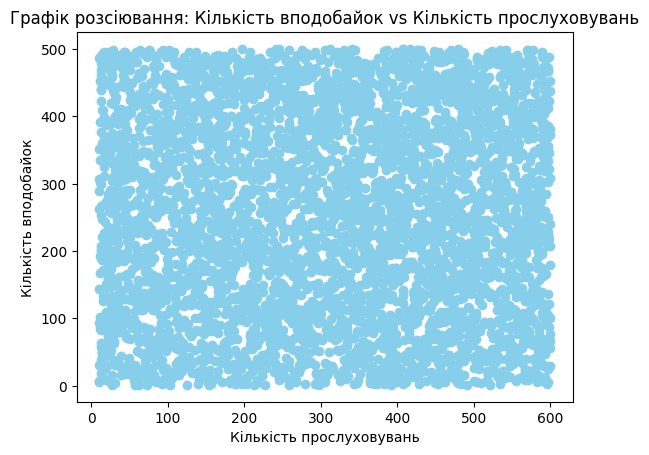

In [19]:
plt.scatter(df['Minutes Streamed Per Day'], df['Number of Songs Liked'], color="skyblue")
plt.title('Графік розсіювання: Кількість вподобайок vs Кількість прослуховувань')
plt.xlabel('Кількість прослуховувань')
plt.ylabel('Кількість вподобайок')
plt.show()

Додатково виведемо 2 графіка для порівняння розподілу між кількість вподобайок та кількість прослуховувань

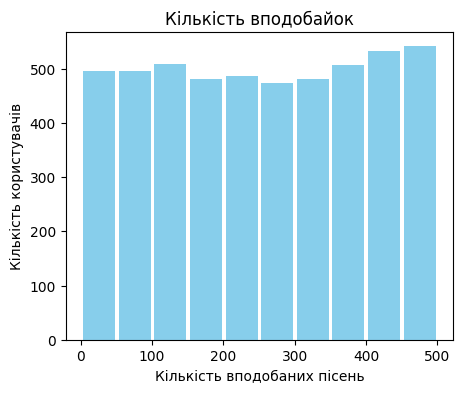

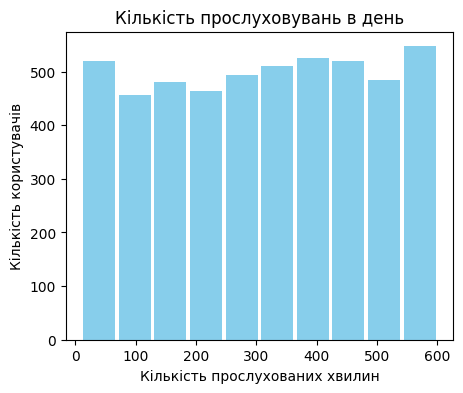

In [20]:
plt.figure(figsize=(5,4))
plt.hist(df['Number of Songs Liked'], color="skyblue", rwidth=0.9)
plt.title('Кількість вподобайок')
plt.xlabel('Кількість вподобаних пісень')
plt.ylabel('Кількість користувачів')
plt.show()

plt.figure(figsize=(5,4))
plt.hist(df['Minutes Streamed Per Day'], color="skyblue",  rwidth=0.9)
plt.title('Кількість прослуховувань в день')
plt.xlabel('Кількість прослухованих хвилин')
plt.ylabel('Кількість користувачів')
plt.show()

Будемо використовувати коефіцієнт кореляції Пірсона для вимірювання сили лінійного взаємозвʼязку.  
Графік показав, що розподіли приблизно симетричні.

In [21]:
correlation, p_value = pearsonr(df['Number of Songs Liked'], df['Minutes Streamed Per Day'])

print(f'Коефіцієнт кореляції Пірсона: {correlation:.4f}')
print(f'P-value: {p_value:.4f}')

Коефіцієнт кореляції Пірсона: 0.0235
P-value: 0.0968


In [22]:
alpha = 0.05

In [23]:
if (p_value < alpha):
    print('Відхиляємо гіпотезу Н_0. Є значущий зв’язок між лайками та хвилинами прослуховування.')
else:
    print('Не можемо відхилити гіпотезу Н_0. Немає значущого статистично зв’язку.')

Не можемо відхилити гіпотезу Н_0. Немає значущого статистично зв’язку.


**Висновок:**   
Немає достатніх доказів, щоб відкинути H0 (нульову гіпотезу).
Кількість вподобайок та кількість прослуханих хвилин не мають значущого зв’язку. Кориляційні звʼязки дуже малі, отже, взаємозалежність між ними майже немає. 

**8 Питання** Скільки користувачів за типом підписки?

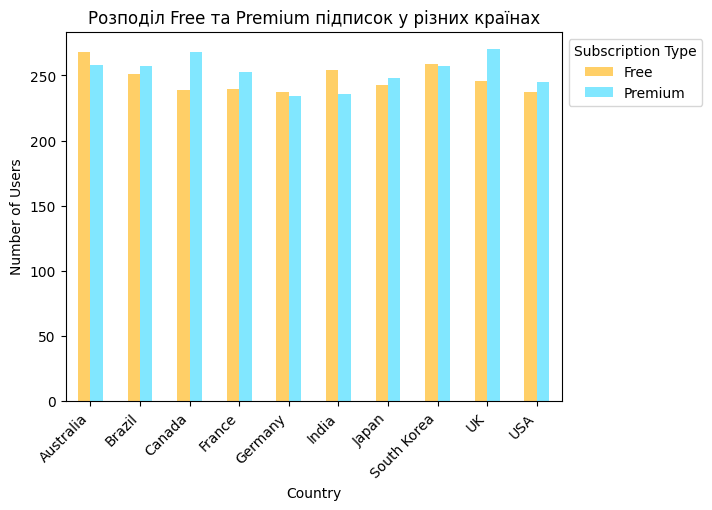

In [24]:
# групуємо дані за країною та типом підписки 
subscriptions_count = df.groupby('Country')['Subscription Type'].value_counts().unstack()

subscriptions_count.plot(kind='bar', colormap='managua')

plt.xlabel('Country')
plt.ylabel('Number of Users')
plt.title('Розподіл Free та Premium підписок у різних країнах')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Subscription Type', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

**Висновки:** В деяких країнах люди готові платити за підписку, в деяких переважають безкоштовні аккаунти. Найбільший відрив у Індії, можемо припустити, що менш платоспроможне населення.
Якщо ми хочемо, щоб більше користувачів брали Premium маємо запропонувати користувачам, щось що зробить зручнішим користування, а наприклад, для менш затезпечених країн запропонувати інші тариф підписки.

**9 Питання:** Чи наші Premium користувачі частіше слухають музику?

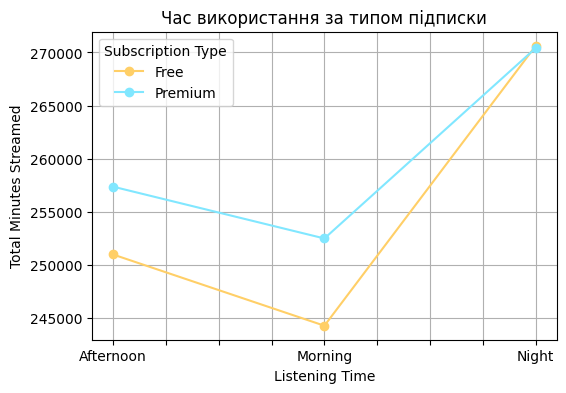

In [25]:
# Розгортаємо таблицю, щоб мати окремі лінії для кожного типу підписки
subscription_by_time = df.groupby(['Subscription Type', 'Listening_Time'])['Minutes Streamed Per Day'].sum().unstack()

subscription_by_time.T.plot(kind='line', marker='o', colormap='managua', figsize=(6,4))

plt.xlabel('Listening Time')
plt.ylabel('Total Minutes Streamed')
plt.title('Час використання за типом підписки')
plt.legend(title='Subscription Type')
plt.grid(True)
plt.show()


**Висновок:** Дійсно користувачі з Premium підпискою частіше слухають музику.

Ми можемо створити плейлисти відповідно часу:
*Для ранку*, щось надихаюче і заряджіюче.  
*Для обіднього часу*, щось енергійне і для більшої концентрації.  
*Для вечора*, щось спокійніше для сну.  
Так, ми зможемо рекомендувати музичні треки відповідно біоритмам і настрою користувачів, тоді наші користувачі будуть повертатися за цим самовідчуттям.

**10 Питання:** Чи слухають Premium користувачі улюблені пісні частіше?  
  
Якщо наші користувачі люблять відтворювати альбом з улюбленими виконавцями, ми можемо запропонувати нові ремікси, нове звучання улюблених пісень.

In [26]:
repeat_rate_by_subscription = df.groupby('Subscription Type')['Repeat_Song_Rate'].mean().round(2)
print(repeat_rate_by_subscription)

Subscription Type
Free       42.77
Premium    42.02
Name: Repeat_Song_Rate, dtype: float64


Бачимо, що в середньому більше відтворень на безкоштовному тарифі.

Ми можемо запропонувати для користувачів на підписці Free безкоштовний пробний період, щоб показати наскільки приємно і зручно мати Premium підписку. Слухати музику без реклами з персональними вподобаннями.

## Висновки:
- Найпопулярніші платформи у світі для прослуховування Amazon Music та Tidal. Ця тенденція зберігається в половині досліджених країн.  
- Bad Bunny - найпопулярніший виконавець серед користувачів.  
- Reggae та Jazz - найпопулярніші музичні жанри.  
- Середній вік користувачів складає 35-37 років.  
- Користувачі з платною підпискою дійсно частіше слухають музику.  
## Рекомендації:
- Обирати найпопулярніші музичні платформи в країні для більшого охоплення слухачів.  
- Визначити, яка вікова аудиторія є цільовою, та орієнтуватися на її смаки й вподобання.  
- Це дозволить збільшити охоплення цільової аудиторії, а далі — перетворити слухачів на клієнтів.  
  ***Щоб цього досягти потрібно:***  
- Пропонувати нові можливості для комфортного прослуховування.  
- Аналізувати вподобання користувачів, час користування платформою та рівень платоспроможності.  